In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Data/Fish.csv')
data.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [3]:
temp = np.array(data)

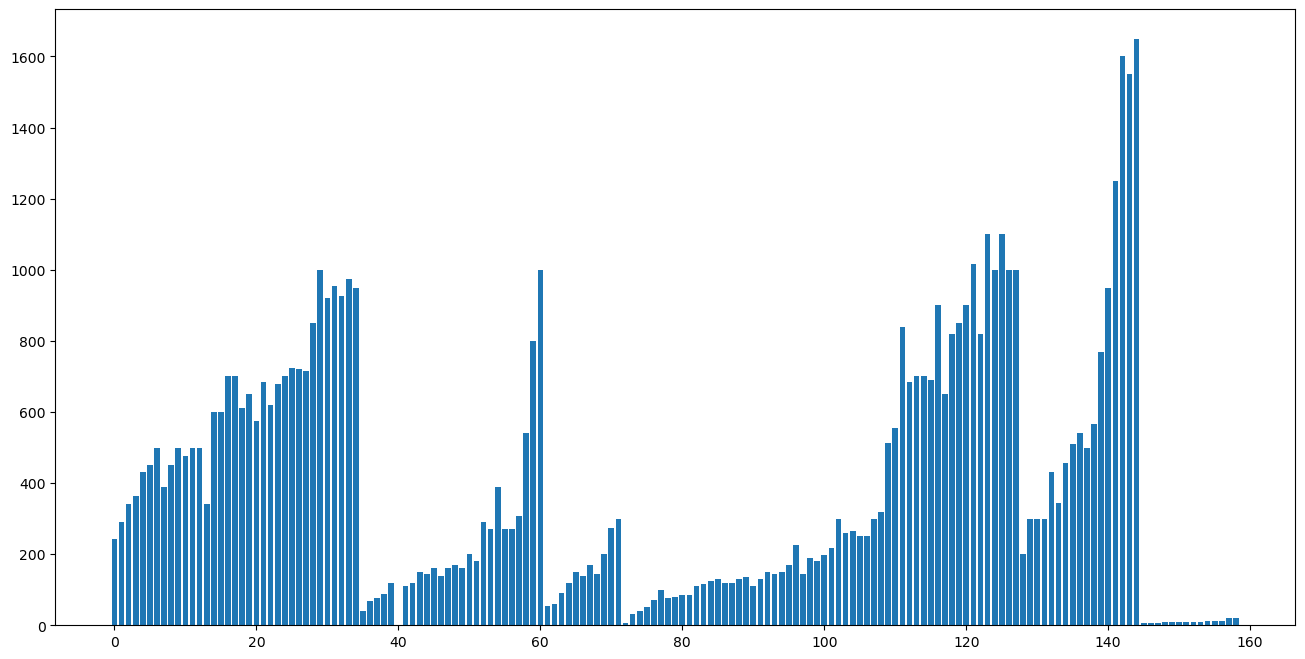

In [4]:
fig = plt.figure(figsize=(16,8))
plt.bar(range(data.shape[0]),data.Weight)
plt.show()

In [5]:
print(data.Species.unique())
print(data.Species.value_counts())

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']
Species
Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: count, dtype: int64


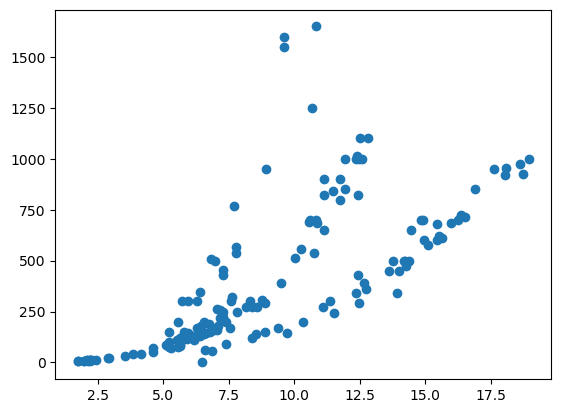

In [6]:
plt.scatter(data.Height,data.Weight)

In [7]:
temp = np.array(data)
labels = data.Species
values = temp[:,1:]
values.shape

(159, 6)

In [9]:
from sklearn.cluster import KMeans
model = KMeans(7)
model.fit(values)

C:\Users\banerji\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=7)

In [12]:
model.labels_

array([0, 0, 0, 0, 6, 6, 6, 0, 6, 6, 6, 6, 6, 0, 6, 6, 1, 1, 6, 1, 6, 1,
       6, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 5, 3, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 0, 0, 0, 0, 0, 0, 6, 1, 2, 3, 3, 3, 5, 5,
       5, 5, 5, 5, 0, 0, 3, 3, 3, 3, 3, 5, 3, 3, 3, 3, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 0, 0, 0, 0, 0, 0, 0, 6,
       6, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 5, 0, 0, 0,
       6, 0, 6, 6, 6, 6, 6, 1, 2, 2, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3])

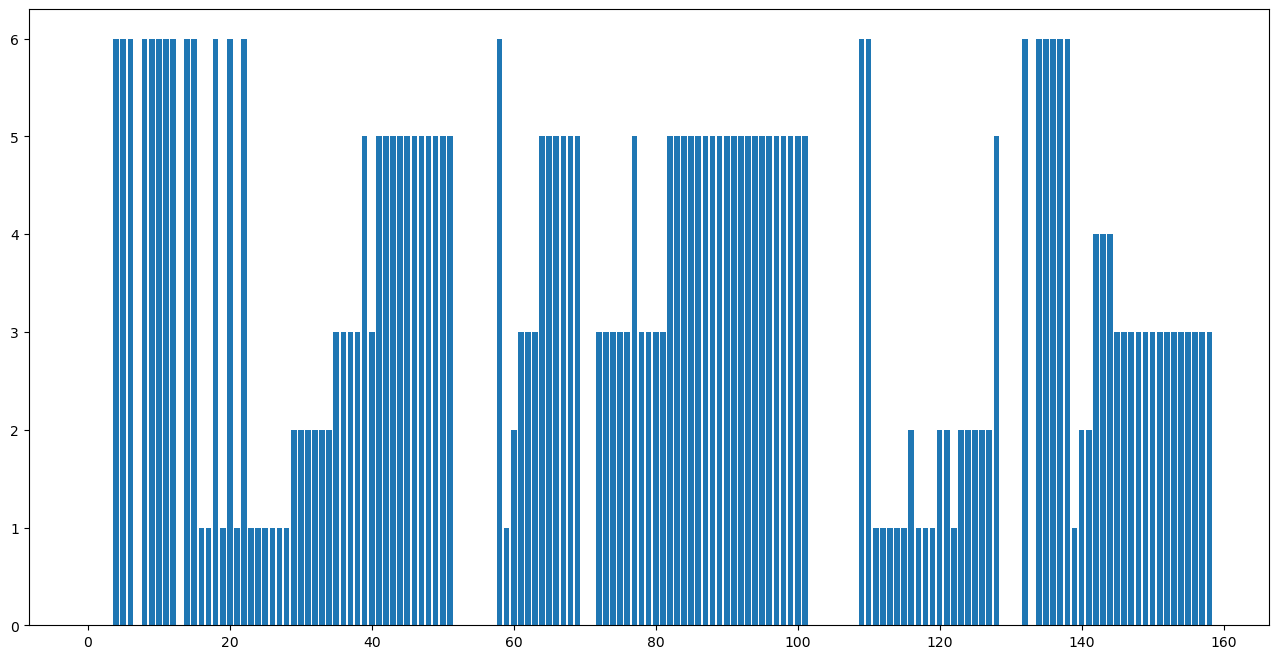

In [17]:
fig = plt.figure(figsize=(16,8))
plt.bar(range(len(model.labels_)),model.labels_)
plt.show()

C:\Users\banerji\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


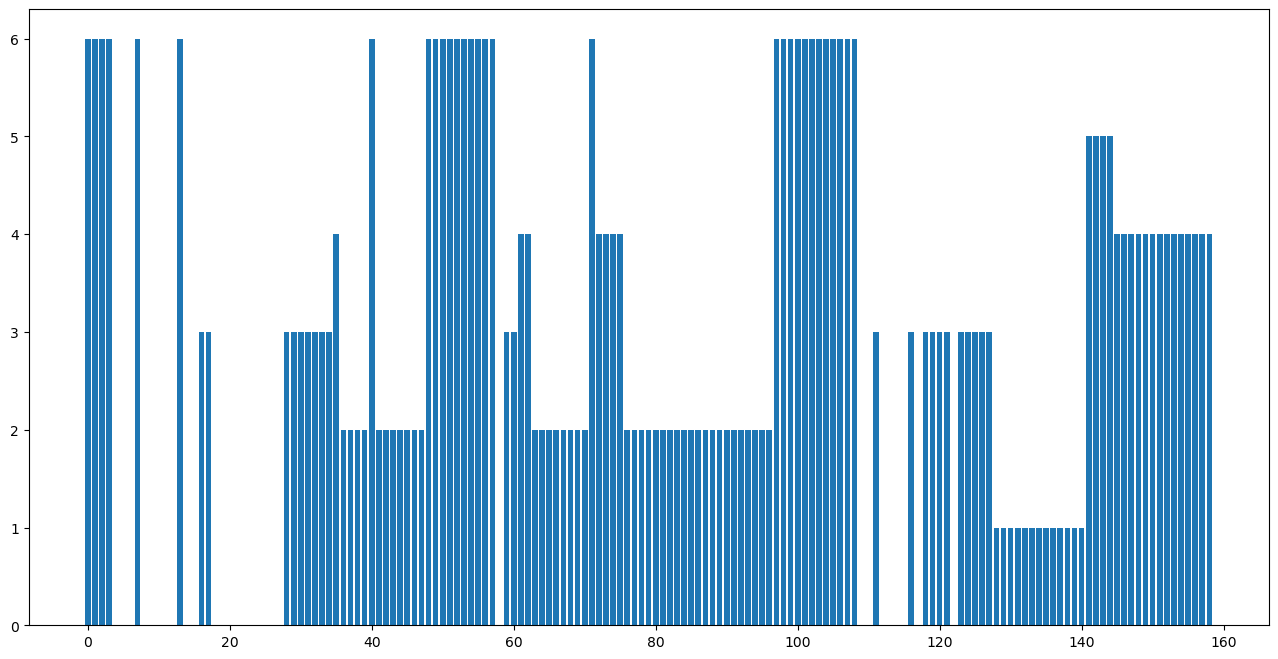

In [21]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2,whiten=True)
lowDimValues = pca.fit_transform(values)
model2 = KMeans(7)
model2.fit(lowDimValues)
fig = plt.figure(figsize=(16,8))
plt.bar(range(len(model2.labels_)),model2.labels_)
plt.show()

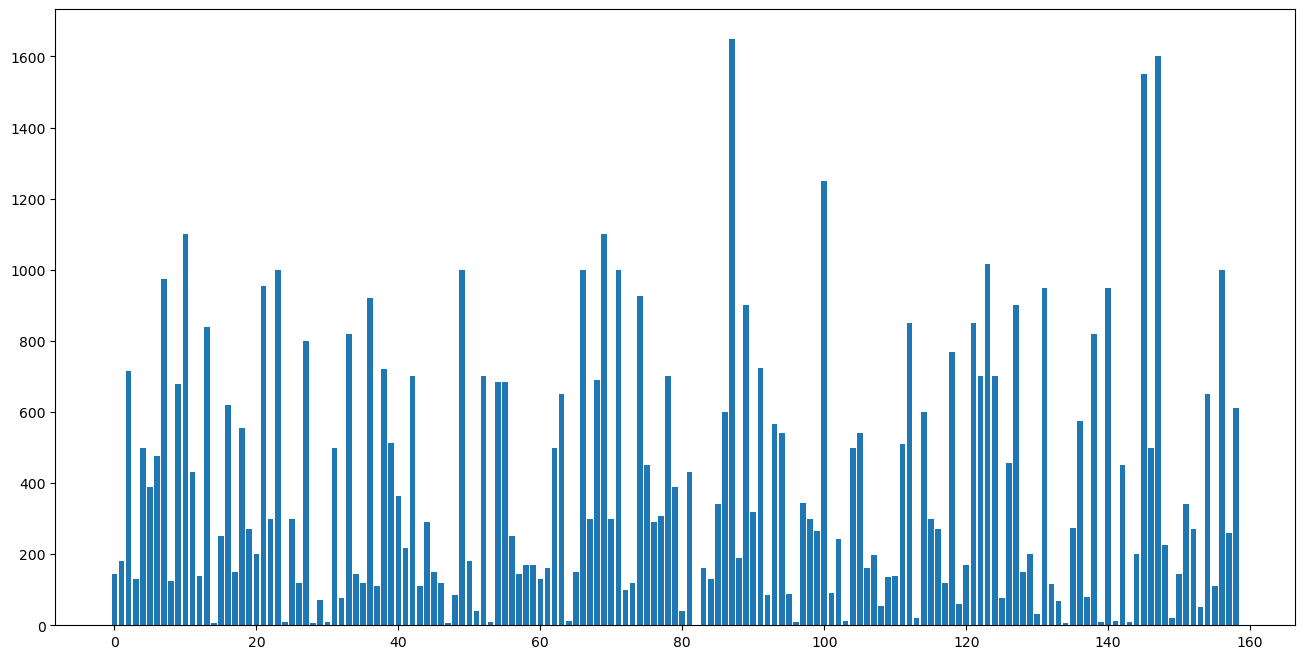

In [22]:
data = data.sample(frac=1.0)
fig = plt.figure(figsize=(16,8))
plt.bar(range(data.shape[0]),data.Weight)
plt.show()

In [25]:
train = 0.8

traindata = []
testdata = []
trainlabels = []
testlabels = []



species_names = data.Species.unique()

for i in range(len(species_names)):
    species_data = data[data.Species==species_names[i]]
    temp = np.array(species_data)
    values = temp[:,1:]
    traincount = int(train * len(species_data))
    testcount = len(species_data) - traincount
    for u in range(traincount):
        trainlabels.append(species_names[i])
        traindata.append(values[u,:])
    for v in range(traincount, traincount+testcount):
        testlabels.append(species_names[i])
        testdata.append(values[v,:])
    
traindata = np.array(traindata)   
testdata = np.array(testdata)
trainlabels = np.array(trainlabels)
testlabels = np.array(testlabels)

In [27]:
print(traindata.shape, trainlabels.shape, testdata.shape, testlabels.shape)


(124, 6) (124,) (35, 6) (35,)


In [29]:
def euclideanDistance(a, b):
    total = 0
    for i in range(a.shape[0]):
        total += (a[i]-b[i]) ** 2
    return np.sqrt(total)

def manhattanDistance(a, b):
    total = 0
    for i in range(a.shape[0]):
        total += np.abs(a[i]-b[i])
    return total


In [31]:
distances = np.zeros([testdata.shape[0],traindata.shape[0]])
for test in range(testdata.shape[0]):
    a = testdata[test,:]
    for train in range(traindata.shape[0]):
        b = traindata[train,:]
        distances[test, train] = manhattanDistance(a, b)
    
distances    

array([[816.2718, 833.32  , 841.595 , ..., 929.581 , 823.723 , 922.3636],
       [143.756 , 126.7078, 118.4328, ...,  30.4468, 136.3048,  37.6642],
       [ 35.4582,  18.41  ,  10.585 , ...,  79.711 ,  28.6332,  71.953 ],
       ...,
       [ 15.0768,  27.715 ,  30.275 , ..., 114.1116,  12.4568, 106.8942],
       [142.0488, 159.097 , 167.372 , ..., 255.358 , 149.5   , 248.1406],
       [ 61.8262,  78.8744,  87.1572, ..., 175.1354,  69.2774, 167.918 ]])

In [33]:
distances.shape

(35, 124)

In [35]:
indexes = np.argsort(distances)
indexes

array([[ 34,  70,  77, ..., 101, 110,  15],
       [ 55,  18, 109, ...,   3,  97,  92],
       [ 11,  47,  50, ...,   3,  97,  92],
       ...,
       [ 22,  49, 117, ...,   3,  97,  92],
       [112,  37,  48, ...,   3,  97,  92],
       [ 38,  33,  17, ...,   3,  97,  92]], dtype=int64)

In [37]:
## NN Classification
predictions = []
for test in range(testdata.shape[0]):
    predictions.append(trainlabels[indexes[test,0]])
predictions = np.array(predictions)
print(predictions)
score = np.sum(predictions==testlabels)
print('Score:', score / predictions.shape[0])

['Perch' 'Roach' 'Perch' 'Roach' 'Perch' 'Perch' 'Perch' 'Parkki' 'Bream'
 'Perch' 'Perch' 'Perch' 'Whitefish' 'Perch' 'Perch' 'Perch' 'Bream'
 'Bream' 'Perch' 'Bream' 'Bream' 'Bream' 'Bream' 'Pike' 'Bream' 'Pike'
 'Pike' 'Smelt' 'Smelt' 'Smelt' 'Perch' 'Whitefish' 'Perch' 'Whitefish'
 'Perch']
Score: 0.6


In [39]:
## K-NN Classification
from scipy import stats as st

K = 3
predictions = []
for test in range(testdata.shape[0]):
    temp = trainlabels[indexes[test,0:K]]
    pred = st.mode(temp).mode[0]
    predictions.append(pred)
    
predictions = np.array(predictions)
print(predictions)
score = np.sum(predictions==testlabels)
print(score / predictions.shape[0])

TypeError: Argument `a` is not recognized as numeric. Support for input that cannot be coerced to a numeric array was deprecated in SciPy 1.9.0 and removed in SciPy 1.11.0. Please consider `np.unique`.

In [59]:
from sklearn.neighbors import KNeighborsClassifier


# K-NN classification
neigh = KNeighborsClassifier(n_neighbors=1, metric='cityblock')
neigh.fit(traindata,trainlabels)



KNeighborsClassifier(metric='cityblock', n_neighbors=1)

In [61]:
guessIdx = np.random.randint(0,testdata.shape[0])
results = neigh.predict(testdata)

print('Actual label:', labels[guessIdx])
print('Predicted label:', results[guessIdx])
print('Classification accuracy:', neigh.score(testdata,testlabels))


Actual label: Bream
Predicted label: Bream
Classification accuracy: 0.6


In [53]:
score = np.sum(results==testlabels)
print('Score:', score / results.shape[0])

Score: 0.6
